In [62]:
import zipfile
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [63]:
# Defining the path
DataPath = '/content/drive/MyDrive/archive'
DataDirectory = '/content/drive'


In [64]:
# Mounting the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Extracting the ZIP file
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')


In [66]:
## Getting the list of all files in 'DataDirectory' and printing it.
DataFiles = os.listdir(DataDirectory)
print(DataFiles)


['MyDrive', '.file-revisions-by-id', '.shortcut-targets-by-id', '.Trash-0']


In [67]:
#Creating the path to 'ImageDirectory' and listing its contents.

ImageDirectory = os.path.join('/content/drive/MyDrive/archive/Brain Tumor')
ImgDirectoryContents = os.listdir(ImageDirectory)


In [68]:
# Printing the first few data
ImgDirectoryContents[:10]


['Brain Tumor']

In [69]:
# Loading the CSV file
BrainTumor = pd.read_csv('/content/drive/MyDrive/archive/Brain Tumor.csv')
BTDataset3 = pd.read_csv('/content/drive/MyDrive/archive/bt_dataset_t3.csv')


In [70]:
# Information about the BTDataset3
BTDataset3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               1644 non-null   object 
 1   Mean                1644 non-null   float64
 2   Variance            1644 non-null   float64
 3   Standard Deviation  1644 non-null   float64
 4   Entropy             1644 non-null   float64
 5   Skewness            1275 non-null   float64
 6   Kurtosis            1275 non-null   float64
 7   Contrast            1644 non-null   float64
 8   Energy              1644 non-null   float64
 9   ASM                 1644 non-null   float64
 10  Homogeneity         1644 non-null   float64
 11  Dissimilarity       1644 non-null   float64
 12  Correlation         1644 non-null   float64
 13  Coarseness          1644 non-null   float64
 14  PSNR                1644 non-null   float64
 15  SSIM                1275 non-null   float64
 16  MSE   

In [71]:
# First few rows of the BTDataset3
print(BTDataset3.head())


    Image       Mean     Variance  Standard Deviation   Entropy  Skewness  \
0  Image1  23.448517  2538.985627           50.388348  0.651174  1.984202   
1  Image2   4.398331   834.853030           28.893823  0.953532  6.495203   
2  Image3   3.244263   642.059166           25.338886  0.966065  7.772860   
3  Image4   8.511353  1126.214187           33.559115  0.868765  3.763142   
4  Image5  21.000793  2235.316978           47.279139  0.684724  1.936029   

    Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0   5.421042  181.467713  0.781557  0.610831     0.847033       2.765411   
1  43.349355   76.745886  0.972770  0.946281     0.980762       0.548605   
2  61.756034   81.752406  0.980161  0.960715     0.985066       0.540411   
3  15.107579  362.291213  0.921786  0.849690     0.949295       2.765725   
4   4.722343  312.439226  0.804184  0.646711     0.880301       3.006660   

   Correlation     Coarseness        PSNR      SSIM       MSE        DC  \
0    

In [72]:
# Last few rows of the BTDataset3
print(BTDataset3.tail())


          Image      Mean    Variance  Standard Deviation   Entropy  \
1639  Image1640  0.199158   26.491880            5.147026  0.996341   
1640  Image1641  6.885025  802.478515           28.328052  0.878419   
1641  Image1642  1.828186  230.107684           15.169301  0.966424   
1642  Image1643  0.061630    8.029570            2.833650  0.998740   
1643  Image1644  0.718506   91.460572            9.563502  0.986739   

       Skewness     Kurtosis    Contrast    Energy       ASM  Homogeneity  \
1639  25.826301   668.181974   14.797350  0.997873  0.995751     0.998476   
1640   3.939967    16.456794  266.135425  0.927687  0.860602     0.951086   
1641   8.218790    68.539071  105.172699  0.980371  0.961128     0.985590   
1642  45.985085  2116.600001    6.431276  0.999268  0.998536     0.999401   
1643  13.268497   177.139371   42.023257  0.992277  0.984614     0.994537   

      Dissimilarity  Correlation     Coarseness       PSNR      SSIM  \
1639       0.113842     0.755553  7.45

In [73]:
# Descriptive statistics of the BTDataset3
print(BTDataset3.describe())


              Mean     Variance  Standard Deviation      Entropy     Skewness  \
count  1644.000000  1644.000000         1644.000000  1644.000000  1275.000000   
mean      3.125191   377.214252           14.206369     0.949141    16.996439   
std       5.359059   548.174013           13.247645     0.094175    21.247054   
min       0.000000     0.000000            0.000000     0.530684     1.219356   
25%       0.037800     6.030021            2.455609     0.951339     5.437071   
50%       0.798752   123.306079           11.104325     0.988411     9.377379   
75%       3.584896   548.029238           23.409950     0.999407    20.319678   
max      31.031021  3345.853590           57.843354     1.000000   255.994850   

           Kurtosis     Contrast       Energy          ASM  Homogeneity  \
count   1275.000000  1644.000000  1644.000000  1644.000000  1644.000000   
mean     742.215017    58.206011     0.968980     0.942412     0.979727   
std     2934.685940    76.370330     0.059090

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [74]:
# Checking for null values
print(BTDataset3.isnull().sum())


Image                   0
Mean                    0
Variance                0
Standard Deviation      0
Entropy                 0
Skewness              369
Kurtosis              369
Contrast                0
Energy                  0
ASM                     0
Homogeneity             0
Dissimilarity           0
Correlation             0
Coarseness              0
PSNR                    0
SSIM                  369
MSE                     0
DC                     98
Target                  0
dtype: int64


In [75]:
# Removing null values from the BTDataset3
BTDataset3 = BTDataset3.dropna()


In [76]:
# Listing the columns of the BTDataset3
print(BTDataset3.columns)


Index(['Image', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE',
       'DC', 'Target'],
      dtype='object')


In [77]:
# Getting information about the BrainTumor
print(BrainTumor.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [78]:
# Printing the first few data
BrainTumor.head()


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [79]:
# Displaying the last few rows
print(BrainTumor.tail())


          Image  Class       Mean     Variance  Standard Deviation   Entropy  \
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

      Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
3757  2.082079   4.647310  158.437600  0.220666  0.048693     0.487131   
3758  2.144625   4.882034  161.158675  0.225931  0.051045     0.502712   
3759  2.308349   5.579498  167.130118  0.228930  0.052409     0.492269   
3760  2.732822   7.757570  223.812932  0.261527  0.068397     0.480064   
3761  4.110669  17.538826  239.251388  0.306224  0.093773     0.494333   

      Dissimilarity  Correlation     Coarseness  
3757       5.211739     

In [80]:
# Describing the numerical columns
print(BrainTumor.describe())


             Class         Mean     Variance  Standard Deviation      Entropy  \
count  3762.000000  3762.000000  3762.000000         3762.000000  3762.000000   
mean      0.447368     9.488890   711.101063           25.182271     0.073603   
std       0.497288     5.728022   467.466896            8.773526     0.070269   
min       0.000000     0.078659     3.145628            1.773592     0.000882   
25%       0.000000     4.982395   363.225459           19.058475     0.006856   
50%       0.000000     8.477531   622.580417           24.951560     0.066628   
75%       1.000000    13.212723   966.954319           31.095889     0.113284   
max       1.000000    33.239975  2910.581879           53.949809     0.394539   

          Skewness     Kurtosis     Contrast       Energy          ASM  \
count  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000   
mean      4.102727    24.389071   127.961459     0.204705     0.058632   
std       2.560940    56.434747   109.499601    

In [81]:
# Checking for null values
print(BrainTumor.isnull().sum())


Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


In [82]:
# Listing the columns
print(BrainTumor.columns)


Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')


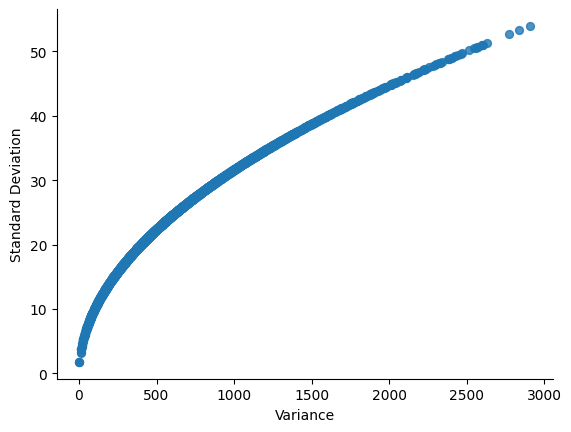

In [83]:
# Plotting Variance vs Standard Deviation
BrainTumor.plot(kind='scatter', x='Variance', y='Standard Deviation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


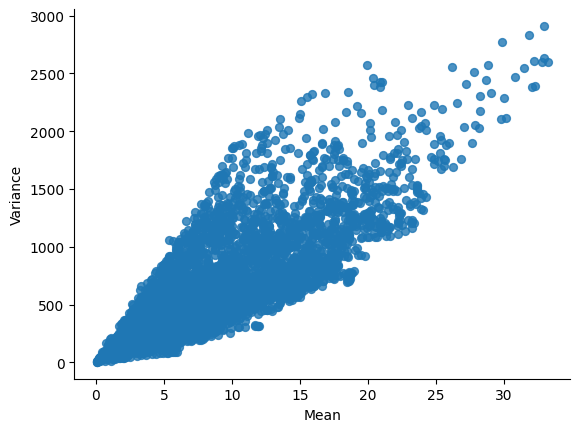

In [84]:
# Plotting Mean vs Variance
BrainTumor.plot(kind='scatter', x='Mean', y='Variance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


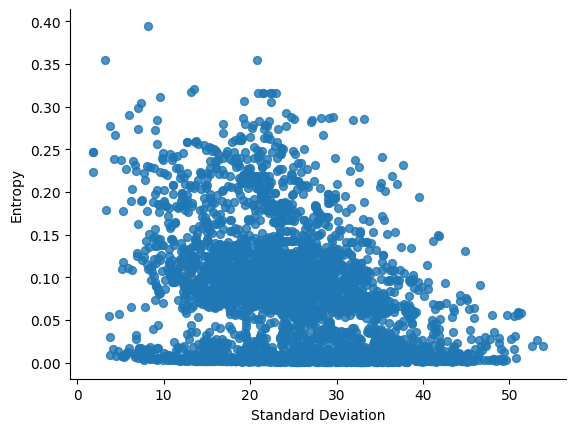

In [85]:
# Plotting Standard Deviation vs Entropy
BrainTumor.plot(kind='scatter', x='Standard Deviation', y='Entropy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


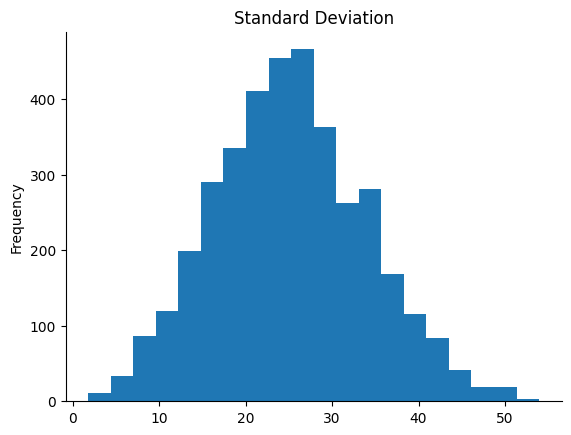

In [86]:
# Plotting Standard Deviation
BrainTumor['Standard Deviation'].plot(kind='hist', bins=20, title='Standard Deviation')
plt.gca().spines[['top', 'right',]].set_visible(False)


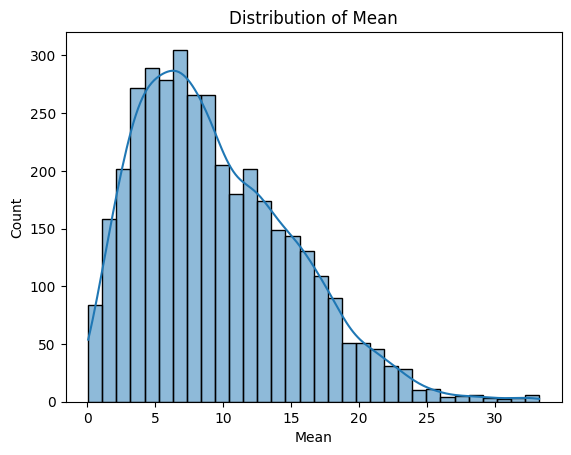

In [87]:
# Visualize distributions
sns.histplot(BrainTumor['Mean'], kde=True)
plt.title('Distribution of Mean')
plt.show()


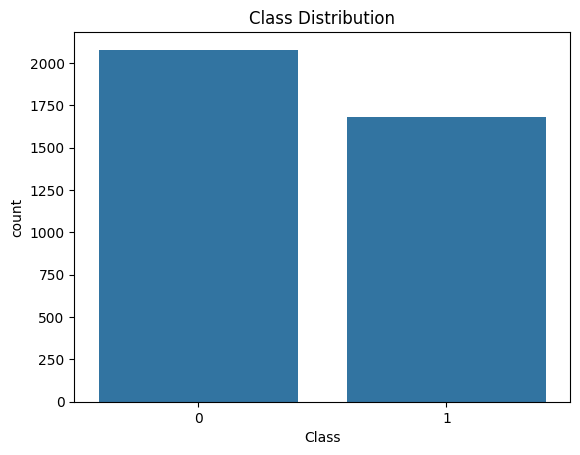

In [88]:
# Plotting Class Distribution
sns.countplot(x='Class', data=BrainTumor)
plt.title('Class Distribution')
plt.show()


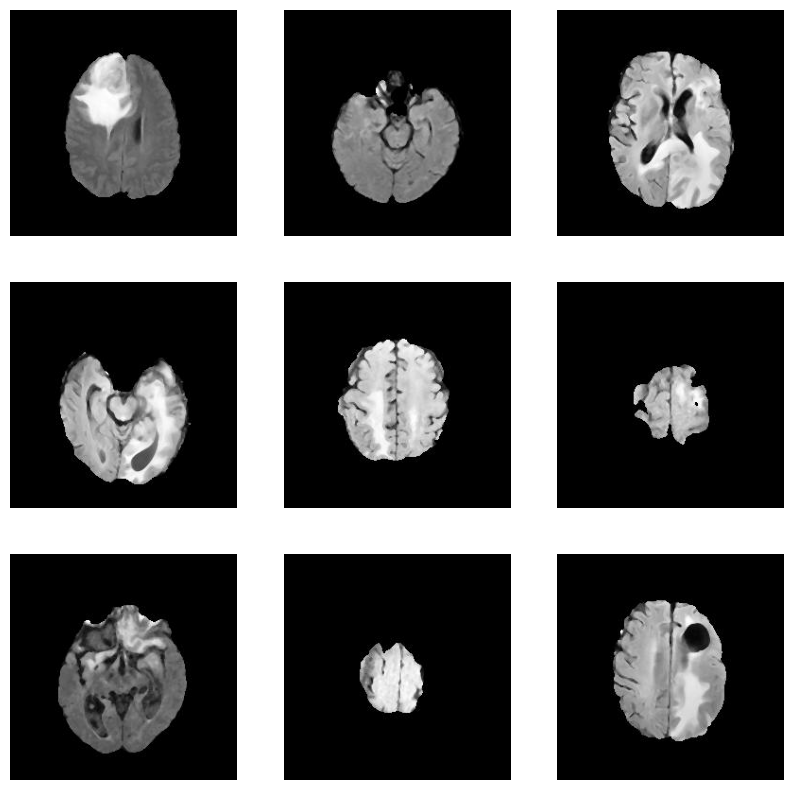

In [89]:
# Displaying the first few images
plt.figure(figsize=(10, 10))
for i in range(9):
  files = os.listdir(os.path.join(ImageDirectory, ImgDirectoryContents[0]))
  file = files[i]
  img_path = os.path.join(ImageDirectory, ImgDirectoryContents[0], file)
  img = mpimg.imread(img_path)
  plt.subplot(3, 3, i + 1)
  plt.imshow(img)
  plt.axis('off')
plt.show()


In [90]:
# Defining the target and features
X = BrainTumor.drop(['Image', 'Class'], axis=1)
y = BrainTumor['Class']


In [91]:
# Encoding the target variable
le = LabelEncoder()
yEncoded = le.fit_transform(y)


In [92]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, yEncoded, test_size=0.2, random_state=42)


In [93]:
# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [94]:

# Training a Random Forest model
RandomModel = RandomForestClassifier(n_estimators=100, random_state=42)
RandomModel.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [95]:
# Predictions
y_pred = RandomModel.predict(X_test)


In [96]:
# Printing Accuracy of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 98.41 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



In [97]:
# Building a simple neural network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [99]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8442 - loss: 0.3705 - val_accuracy: 0.9748 - val_loss: 0.0754
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0704 - val_accuracy: 0.9788 - val_loss: 0.0686
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0576 - val_accuracy: 0.9788 - val_loss: 0.0660
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0538 - val_accuracy: 0.9774 - val_loss: 0.0643
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0472 - val_accuracy: 0.9801 - val_loss: 0.0632
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0466 - val_accuracy: 0.9774 - val_loss: 0.0618
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0431 - val_accuracy: 0.9788 - val_loss: 0.0609
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0448 - val_accuracy: 0.9788 - val_loss

In [100]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy of the Model: {test_acc*100:.2f} %")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9759 - loss: 0.0746 
Test Accuracy of the Model: 97.88 %


In [101]:
# Evaluation of model on testing data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [102]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       419
           1       0.98      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



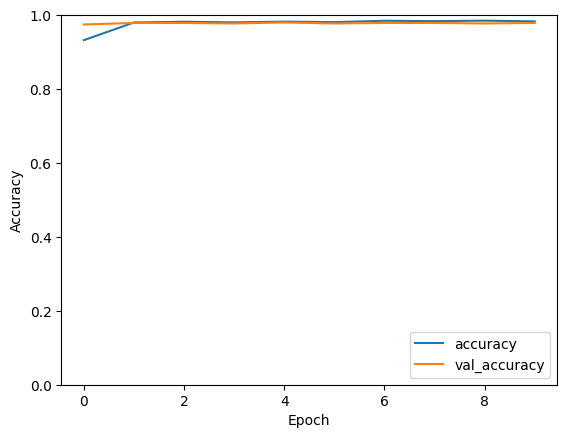

In [103]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [104]:
# Preparing Image Data
image_size = (128, 128)
batch_size = 32


In [105]:

# Initialising training and validation data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Brain Tumor',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Brain Tumor',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 3010 images belonging to 1 classes.
Found 752 images belonging to 1 classes.


In [106]:
# Building a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
# Compiling the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [108]:
# Training the CNN model
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 35s 315ms/step - accuracy: 0.9491 - loss: 0.0487 - val_accuracy: 1.0000 - val_loss: 3.0936e-35
Epoch 2/10
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 1.0000 - loss: 5.6488e-31

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.6488e-31 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 286ms/step - accuracy: 1.0000 - loss: 4.7331e-16 - val_accuracy: 1.0000 - val_loss: 1.7274e-32
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 1.0000 - loss: 3.1506e-21 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 1.0000 - loss: 1.5040e-18 - val_accuracy: 1.0000 - val_loss: 1.3767e-38
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 1.0000 - loss: 5.5604e-33 - val_accuracy: 1.0000 - val_loss: 2.2812e-38
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 296ms/step - accuracy: 1.0000 - loss: 3.3893e-19 - val_accuracy: 1.0000 - val_loss: 2.1709e-37
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 3.7866e-38
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accur

In [109]:
# Evaluating the CNN model
test_loss, test_acc = cnn_model.evaluate(validation_generator)
print(f"Test Accuracy of the CNN Model: {test_acc*100:.2f} %")


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 1.0000 - loss: 1.1438e-36
Test Accuracy of the CNN Model: 100.00 %


In [110]:
# Getting some images and labels
images, labels = next(validation_generator)


In [111]:
# Making predictions on testing images
predictions = cnn_model.predict(images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [112]:
# Threshold predictions to get class labels
predicted_labels = np.ones_like(predictions, dtype=int)


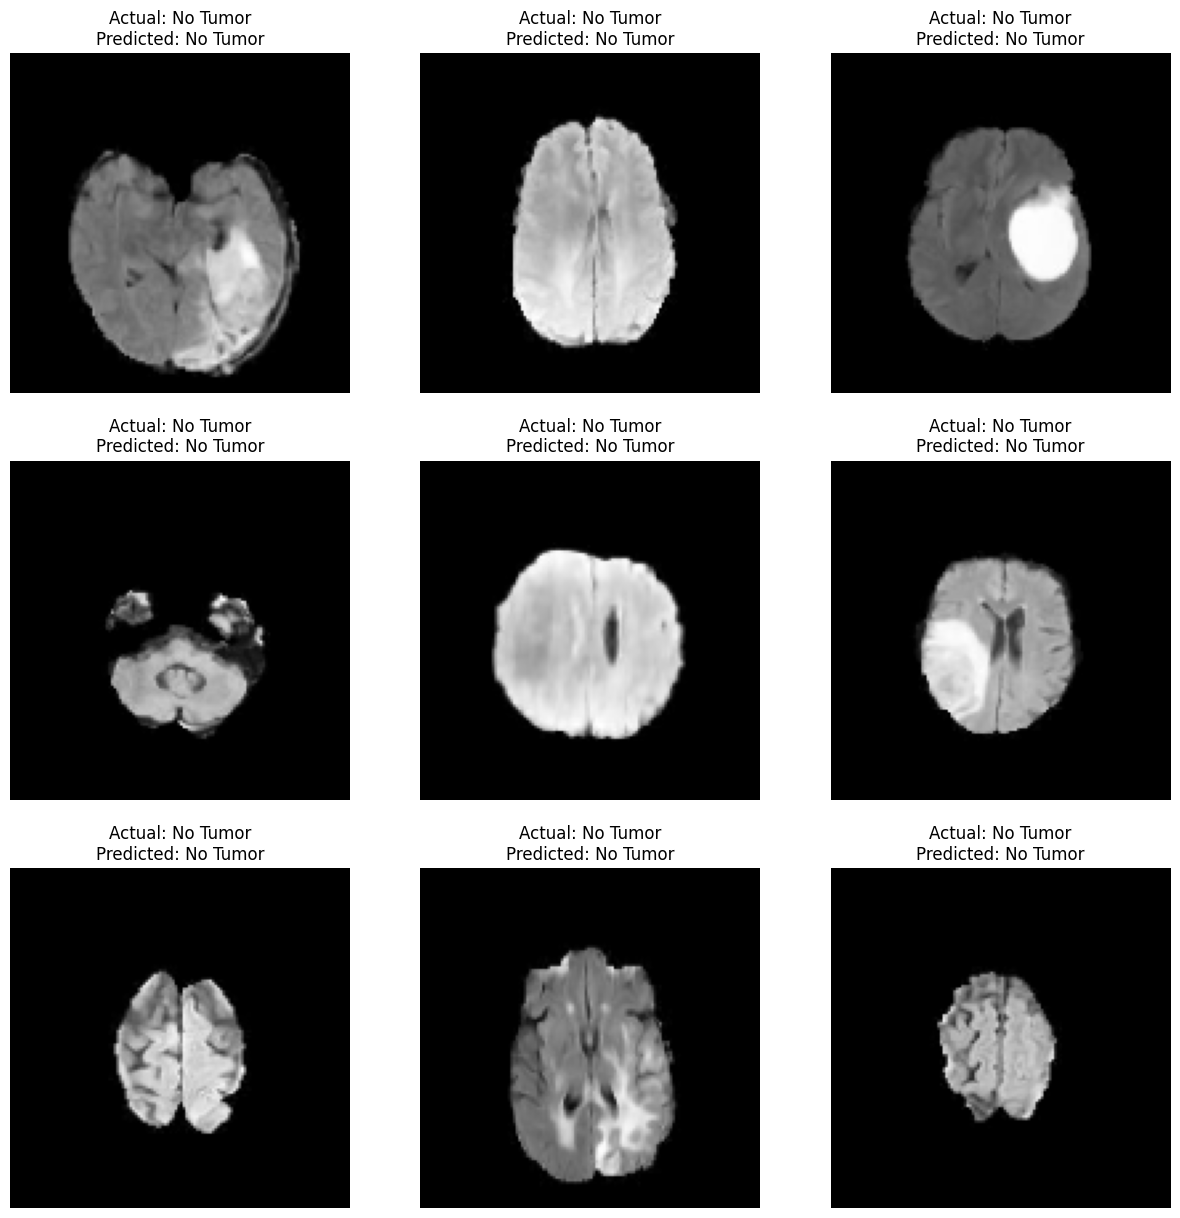

In [122]:
# Plotting images with actual and predicted labels
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    actual_label = "Tumor" if labels[i] == 1 else "No Tumor"
    predicted_label = "Tumor" if predictions[i] > 0.5 else "No Tumor"
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()